Example 1: Comparing KRAS Proteins
===================================


In [1]:
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1' 
import numpy as np

#from GW_prot import *


import sys
sys.path.insert(0,'../src')

from FGW_protein import *

(This dataset has been curated as follows.....XXXXXX)

In [2]:
dir = "../Examples/Examples Data/KRAS ends cut2/"

We start by creating FGW_protein objects for each KRAS protein.

In [3]:
protein_list = [FGW_protein.make_protein_from_pdb(pdb_file = os.path.join(dir, file))  for file in os.listdir(dir)]

We then initialize a `Stress_Comparison` object to compare these proteins using GW and their stresses.
In this example we store the transport plans in RAM for simplicity. This will use roughly 12.6 MB. 

In [4]:
import stress_comparison
A = stress_comparison.Stress_Comparison(prot_list = protein_list, RAM =  True)

We then run GW all-vs-all. On our computer with 16 parallel processes this take 5 seconds. With a single process it takes around 40 seconds. If we set `RAM = False` the computation time takes about 71 amd 81 seconds

In [5]:
sys.path.insert(0,'/home/elijah/pymol/lib/python3.10/site-packages')
from pympler import asizeof

print(asizeof.asizeof(A))
#11883784

11883784


In [6]:
%%time
A.GW_compute_stresses(processes = 16)
#5s

CPU times: user 983 ms, sys: 936 ms, total: 1.92 s
Wall time: 4.94 s


In [7]:
%%time
#41s
A.GW_compute_stresses(processes = 1)

CPU times: user 41.4 s, sys: 117 ms, total: 41.5 s
Wall time: 41.5 s


In [8]:
print(asizeof.asizeof(A))
#609824272

609824272


In [9]:
print(asizeof.asizeof(A.transport_dict))
#593981552

593981552


In [10]:
!mkdir tmp
B = stress_comparison.Stress_Comparison(prot_list = protein_list, RAM =  False, transport_dir= 'tmp')

mkdir: cannot create directory ‘tmp’: File exists


In [11]:
print(asizeof.asizeof(B))
#11759000

11759000


In [24]:
%%time
B.GW_compute_stresses(processes = 16)
#15s

CPU times: user 1.41 s, sys: 1.58 s, total: 2.99 s
Wall time: 14.9 s


In [13]:
%%time
B.GW_compute_stresses(processes = 1)
#79s

CPU times: user 1min, sys: 433 ms, total: 1min
Wall time: 1min 23s


In [14]:
print(asizeof.asizeof(B))
#15845936

15845936


We can study how the conformation of KRAS changes depending on the ligand it is bound to. These PDB files contain KRAS bound to guanosine diphosphate (GDP) and those bound to guanosine triphosphate-analogues (GNP, GCP, GSP).

In [15]:
ligand_list = ['GNP',  'GCP',  'GSP',  'GCP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GSP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GSP',  'GNP',  'GDP',  'GNP',  'GNP',  'GNP',  'GDP',  'GNP',  'GNP',  'GNP',  'GNP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP']

For this visual analysis, we will create a UMAP plot, with different colors corresponding to different ligands. 

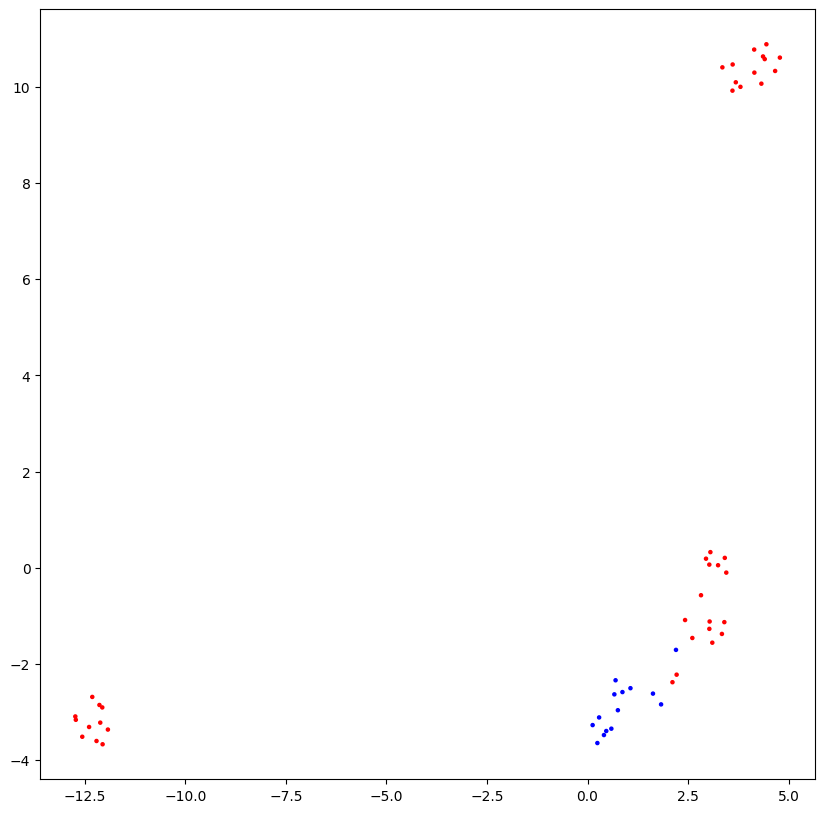

In [16]:
from umap.umap_ import UMAP
import matplotlib.pyplot as plt



distance_matrix = A.get_GW_dmat()

reducer = UMAP(metric = 'precomputed', random_state=14)

embedding = reducer.fit_transform(distance_matrix)
    
        
plt.figure(figsize=(10, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], c= ['red' if l == 'GDP' else 'blue' for l in ligand_list], s=5)
# for i in range(54): 
#     plt.annotate(str(i), (embedding[i, 0], embedding[i, 1] + 0.05), fontsize = 15) 
  
plt.show()



In [17]:
#Although this clustering is only partially explained by the ligands, they do match visible conformational variation in the proteins


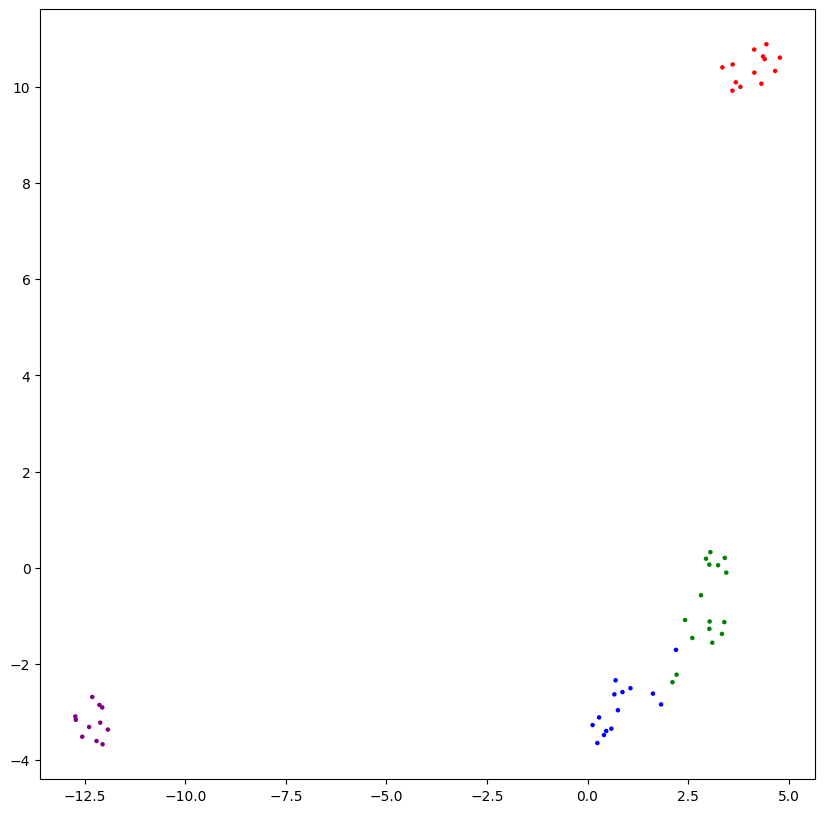

In [18]:

group1 = [11, 34, 39, 40, 41, 42, 43, 44, 45, 46, 47] #purple
group2 = [4, 20,21,22,23,24,25,26,27,49,50,51,52] #red
group3 = [5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 30, 48, 53] #green
group4 = [0, 1, 2, 3, 19, 28, 29, 31, 32, 33, 35, 36, 37, 38] #blue



plt.figure(figsize=(10, 10))
plt.scatter([embedding[i, 0] for i in group1], [embedding[i, 1] for i in group1], c= ['purple']*len(group1), s=5)
plt.scatter([embedding[i, 0] for i in group2], [embedding[i, 1] for i in group2], c= ['red']*len(group2), s=5)
plt.scatter([embedding[i, 0] for i in group3], [embedding[i, 1] for i in group3], c= ['green']*len(group3), s=5)
plt.scatter([embedding[i, 0] for i in group4], [embedding[i, 1] for i in group4], c= ['blue']*len(group4), s=5)

plt.show()



Next we use pymol to visualize the proteins and the stress levels of different residues in the proteins. 
`A.raw_stress_levels` contains the stresses of all the pairwise calculations, so we first average them for each protein.

In [19]:
avg_stresses_dict =  stress_comparison.normalize_stress_dict( A.raw_stress_dict)
avg_stresses_list = [avg_stresses_dict[name] for name in A.name_list]

In [20]:
pymol_protein_viewer.show_proteins_with_values( infiles = [os.path.join(dir, file)  for file in os.listdir(dir)],     chain_ids = [ file[5]  for file in os.listdir(dir)],     data_lists = avg_stresses_list,     output_file = "KRAS ends cut stresses.pse")

The pymol file we generate can then be opened in a pymol GUI window.
![Screenshot](Examples Data/Example 1 Outputs/KRAS stresses screenshot.pdf) 

For clarity we can also view a single protein at a time.



Next we will test how well the stress levels can be used to predict the switch I and switch II regions. These regions do not have well-defined endpoints but we will choose to use residues 30-40 and 60-72 in the canonical indexing respectively. These protein do not contain all the residues so the switch regions are at indices 28-38 and 58-74 instead.

In [21]:

switch_regions_dict = {p.name : [ 1- int(i in range(28,39) or i in range(58,75)) for i in range(161)] for p in protein_list}

avg_precision_dict = stress_comparison.get_AP_scores(avg_stresses_dict, switch_regions_dict)

In [22]:
avg_precision_dict
#TODO - show precision recall curve

{'3gft_A': 0.9668889534130874,
 '4dsn_A': 0.9693193838492158,
 '4dso_A': 0.9567030772451607,
 '4dst_A': 0.965842206288982,
 '4epr_A': 0.9668477274775755,
 '4ept_A': 0.9535714634075838,
 '4epv_A': 0.9688440413476281,
 '4epw_A': 0.9702027370407983,
 '4epx_A': 0.9677386400208486,
 '4epy_A': 0.9680468407888427,
 '4ldj_A': 0.9663632626501745,
 '4lpk_B': 0.97106365889409,
 '4obe_A': 0.9635456250756944,
 '4obe_B': 0.96842452956253,
 '4ql3_A': 0.9661178820791774,
 '4tq9_A': 0.9651585387796667,
 '4tq9_B': 0.9658636581018542,
 '4tqa_A': 0.9678516927021218,
 '4tqa_B': 0.9654132992186241,
 '5mla_A': 0.9572070987913182,
 '5mlb_A': 0.9539122446742481,
 '5mlb_C': 0.9542873837953065,
 '5mlb_E': 0.9526750742482961,
 '5mlb_G': 0.9539215162955939,
 '5o2s_A': 0.9539122446742481,
 '5o2s_C': 0.9542873837953065,
 '5o2s_E': 0.9526750742482961,
 '5o2s_G': 0.9539215162955939,
 '5o2t_A': 0.9572070987913182,
 '5ocg_A': 0.9659365209421029,
 '5tar_A': 0.949791507925561,
 '5ufe_A': 0.9486023702647237,
 '5ufq_A': 0.9

We can also run `stress

In [23]:
transferred_stress = stress_comparison.normalize_stress_dict(A.raw_transferred_stresses(avg_stresses_dict))
transferred_avg_precision_dict = stress_comparison.get_AP_scores(transferred_stress, switch_regions_dict)
transferred_avg_precision_dict

TypeError: combinations() missing required argument 'r' (pos 2)

In [25]:
print(asizeof.asizeof(A))

609824568
